In [2]:
!pip install -r requirements.txt -q

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

(407, 612, 3)


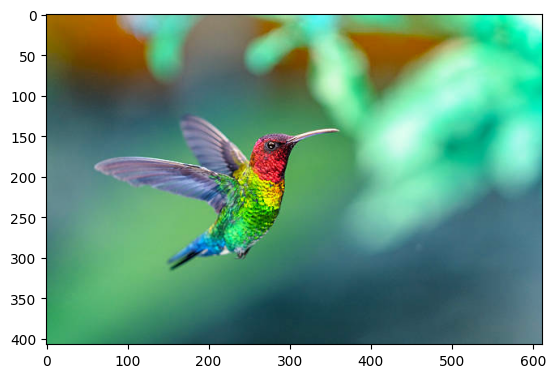

In [5]:
image=cv2.imread('bird.jpg')
print(image.shape)
plt.imshow(image)

## 1. Smoothing Filters

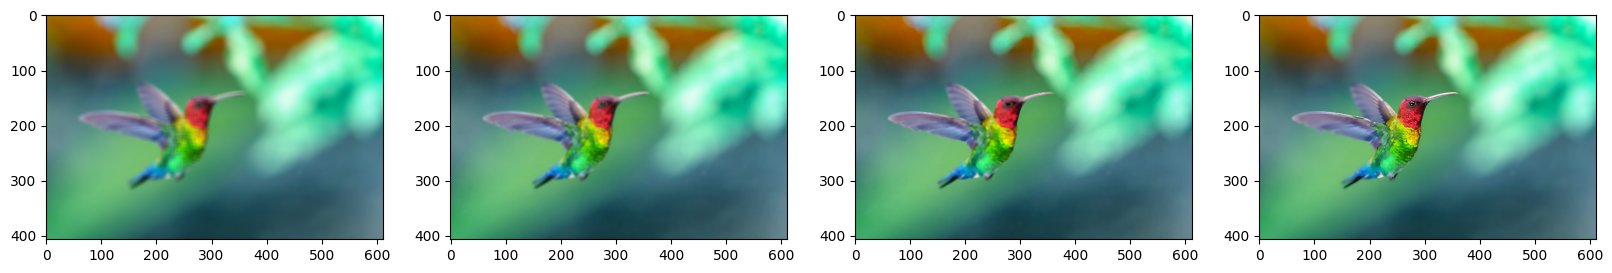

In [17]:
kernel=(9,9)
plt.figure(figsize=(20,17),dpi=100)
plt.subplot(141)
image_blurr=cv2.blur(image,kernel)
plt.imshow(image_blurr)
plt.subplot(142)
gaussian_blurr=cv2.GaussianBlur(image,kernel,0)
plt.imshow(gaussian_blurr)
plt.subplot(143)
median_blurr=cv2.medianBlur(image,5)
plt.imshow(median_blurr)
plt.subplot(144)
bilateral_blurr=cv2.bilateralFilter(image,9,75,75)
plt.imshow(bilateral_blurr)

In [172]:
# Plotting multiple chart at one go

def plot_image(list_images,name_list=None,fig_size=(15,12),horizontal=True,cmap='viridis'):
    l=len(list_images)
    plt.figure(figsize=fig_size,dpi=100)
    for i,j in enumerate(list_images):
        if horizontal:
#            plt.subplot(int('1'+str(l)+str(i+1)))
            plt.subplot(1,l,i+1)
            plt.title(name_list[i])
            plt.axis('off')
            plt.imshow(j,cmap=cmap)
        else:
#            plt.subplot(int(str(l)+'1'+str(i+1)))
            plt.subplot(l,1,i+1)
            plt.title(name_list[i])
            plt.axis('off')
            plt.imshow(j,cmap=cmap)

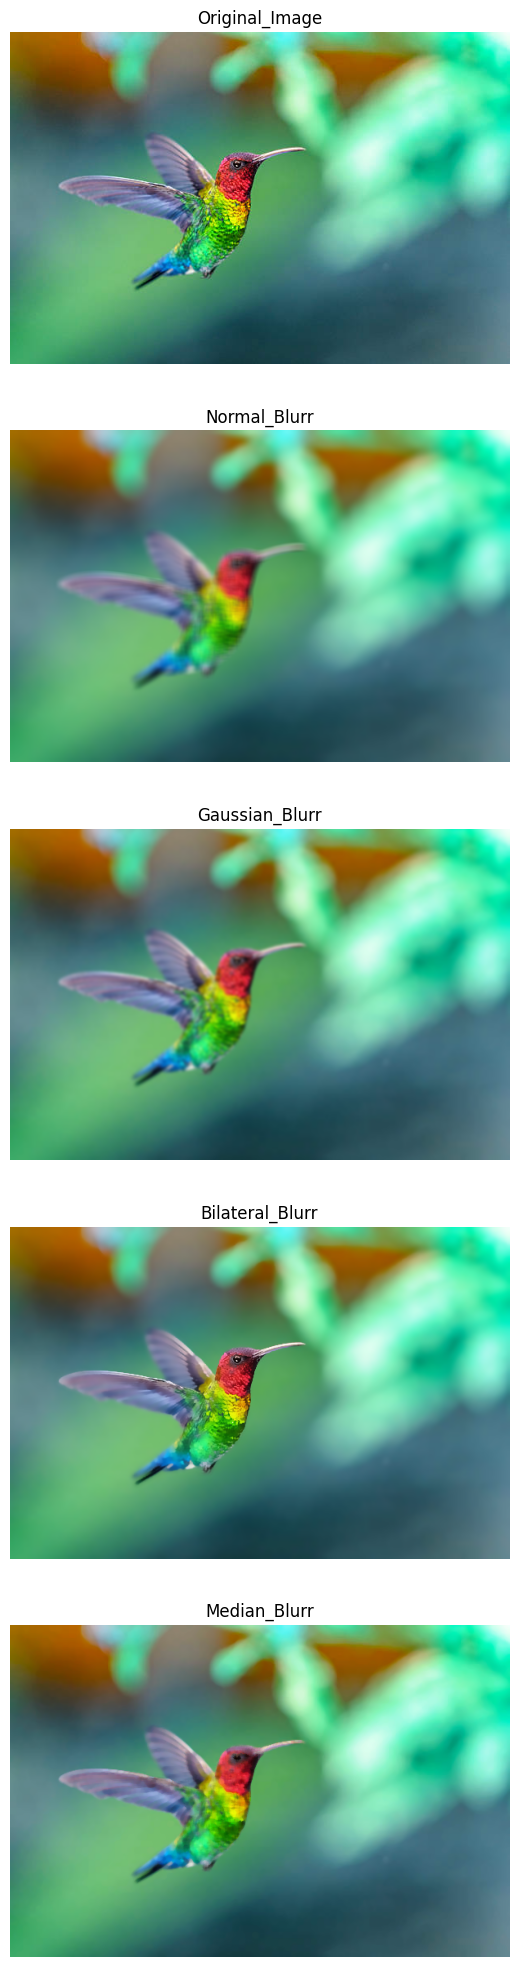

In [112]:
plots=[image,image_blurr,gaussian_blurr,bilateral_blurr,median_blurr]
name_list=['Original_Image','Normal_Blurr','Gaussian_Blurr','Bilateral_Blurr','Median_Blurr']
plot_image(plots,name_list,(30,25),horizontal=False)

## 2. Edge Detection

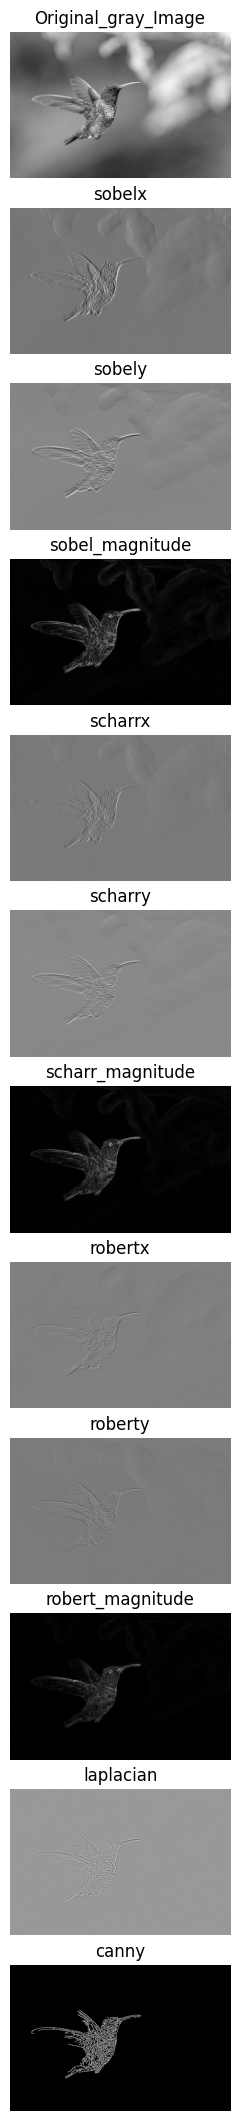

In [113]:
image_gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Sobel x and Y
sobelx=cv2.Sobel(image_gray,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(image_gray,cv2.CV_64F,0,1,ksize=5)
sobel_magnitude=cv2.magnitude(sobelx,sobely)

# Scharr better than sobel in noise reduction

scharrx=cv2.Scharr(image_gray,cv2.CV_64F,1,0)
scharry=cv2.Scharr(image_gray,cv2.CV_64F,0,1)
scharr_magnitude=cv2.magnitude(scharrx,scharry)

# Robert Cross Kernerl 
""" Its not directly implimented in opencv, we need to create a 2x2 matrix and apply it manually
"""
kernel_x=np.array([[1,0],[0,-1]],dtype=np.float32)
kernel_y=np.array([[0,1],[-1,0]],dtype=np.float32)

robertx=cv2.filter2D(image_gray,cv2.CV_64F,kernel_x)
roberty=cv2.filter2D(image_gray,cv2.CV_64F,kernel_y)
rebert_magnitude=cv2.magnitude(robertx,roberty)

# Canny
canny=cv2.Canny(image_gray,100,200)


#Laplacian
laplacian=cv2.Laplacian(image_gray,cv2.CV_64F,ksize=5)

plots=[image_gray,sobelx,sobely,sobel_magnitude,scharrx,scharry,scharr_magnitude,robertx,roberty,rebert_magnitude,laplacian,canny]
name_list=['Original_gray_Image','sobelx','sobely','sobel_magnitude','scharrx','scharry','scharr_magnitude','robertx','roberty','robert_magnitude','laplacian','canny']
plot_image(plots,name_list,(30,27),horizontal=False,cmap='gray')

## 3. Morphological Operations

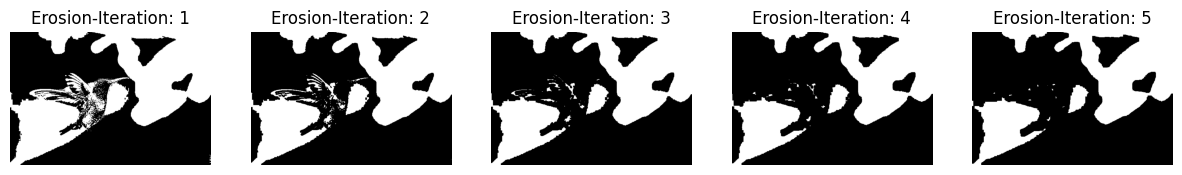

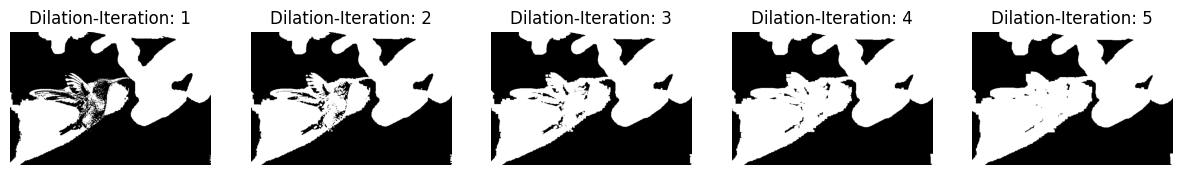

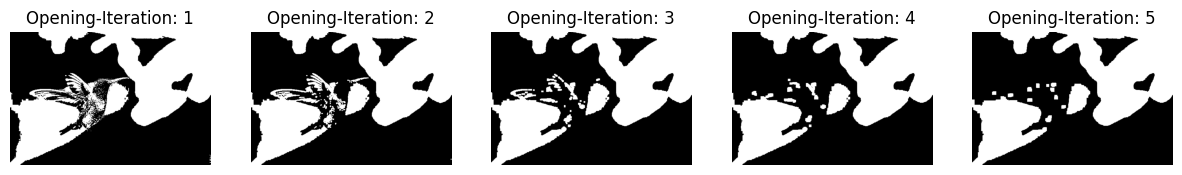

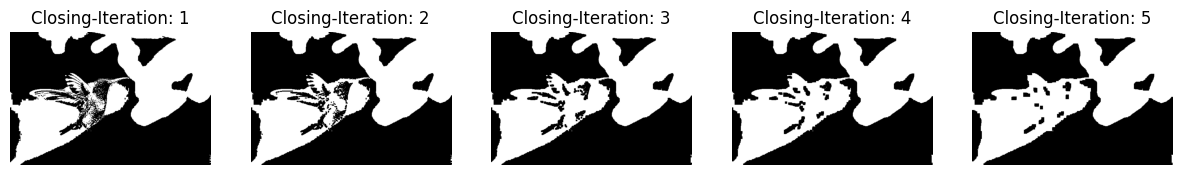

In [171]:
_,binary=cv2.threshold(image_gray,127,255,type=cv2.THRESH_BINARY)

kernel_morph=np.ones((3,3),dtype=np.uint8)

'''
Erosion=cv2.erode(binary,kernel_morph,iterations=1)
Dilation=cv2.dilate(binary,kernel_morph,iterations=5)
'''

#  Erosion
plot=[]
name_list=[]
for i in range(5):
    Erosion=cv2.erode(binary,kernel_morph,iterations=i)
    plot.append(Erosion)
    name_list.append('Erosion-Iteration: '+str(i+1))

plot_image(plot,name_list,cmap='gray',horizontal=True)

# Dilation
plot=[]
name_list=[]
for i in range(5):
    Dilation=cv2.dilate(binary,kernel_morph,iterations=i)
    plot.append(Dilation)
    name_list.append('Dilation-Iteration: '+str(i+1))

plot_image(plot,name_list,cmap='gray')


# Opening
plot=[]
name_list=[]
for i in range(5):
    opening=cv2.morphologyEx(binary,cv2.MORPH_OPEN,kernel_morph,iterations=i)
    plot.append(opening)
    name_list.append('Opening-Iteration: '+str(i+1))

plot_image(plot,name_list,cmap='gray')

# Closing
plot=[]
name_list=[]
for i in range(5):
    closing=cv2.morphologyEx(binary,cv2.MORPH_CLOSE,kernel_morph,iterations=i)
    plot.append(closing)
    name_list.append('Closing-Iteration: '+str(i+1))

plot_image(plot,name_list,cmap='gray')
